In [3]:
#!pip install matplotlib

In [1]:
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix
import json
import numpy as np

from custom_functions import read_df, print_result, aggregate_pred, read_prediction, find_top_index, plot_prediction #  getQAlgo, aggregate_pred, weighted_average, 

In [8]:
#data_dir = "datasets/balanced/"
out_dir = "output/val_dump/"
filename = "jm1"

with open('../datasets/jit/balanced/ss_dict.json', 'r') as f:
    ss_dict = json.load(f)
    
print(filename)
train_len = ss_dict[filename][0] #length from file
list_predictions = []
x_st = 0

list_predictions = []
results= []
res_index = 0

testY = read_prediction(f"{out_dir}{filename}_valY.txt")
for x_end in list(range(500, train_len, 500))+[train_len]:
    out_file_name = f"{out_dir}{filename}_0_{x_end}.txt"
    #print(out_file_name)
    predict = read_prediction(out_file_name)
    list_predictions.append(predict)
    # print(confusion_matrix(testY, predict))
    results.append([res_index] + print_result(testY, predict))
    res_index +=1

top_index = find_top_index(results, show_result=True) #5 results by default.
print("=============================")
for r in results:
    print(r[1:])

jm1
[6, 0.58, 0.55, 0.9, 0.68, 0.58, 0.22]
[3, 0.58, 0.56, 0.77, 0.65, 0.58, 0.18]
[4, 0.55, 0.54, 0.69, 0.61, 0.55, 0.11]
[0, 0.57, 0.57, 0.58, 0.57, 0.57, 0.15]
[2, 0.58, 0.59, 0.47, 0.53, 0.58, 0.16]
[5, 0.62, 0.69, 0.43, 0.53, 0.62, 0.26]
[1, 0.58, 0.68, 0.31, 0.43, 0.58, 0.2]
[0.57, 0.57, 0.58, 0.57, 0.57, 0.15]
[0.58, 0.68, 0.31, 0.43, 0.58, 0.2]
[0.58, 0.59, 0.47, 0.53, 0.58, 0.16]
[0.58, 0.56, 0.77, 0.65, 0.58, 0.18]
[0.55, 0.54, 0.69, 0.61, 0.55, 0.11]
[0.62, 0.69, 0.43, 0.53, 0.62, 0.26]
[0.58, 0.55, 0.9, 0.68, 0.58, 0.22]


In [6]:
print(top_index)

[2, 12, 1, 6, 9]


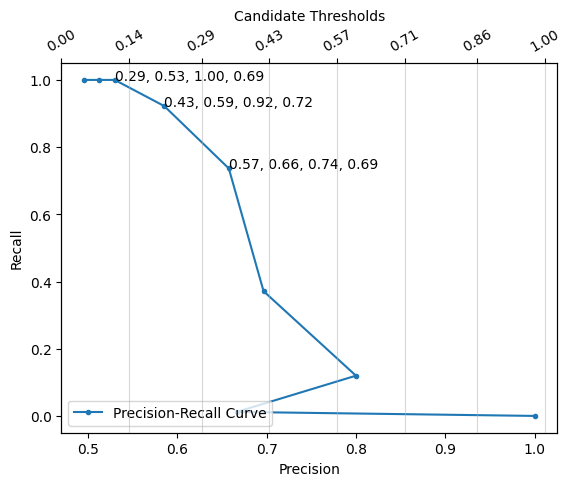

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, matthews_corrcoef, precision_recall_curve
import matplotlib.pyplot as plt

plot_prediction(f"{filename}_all", testY, list_predictions)

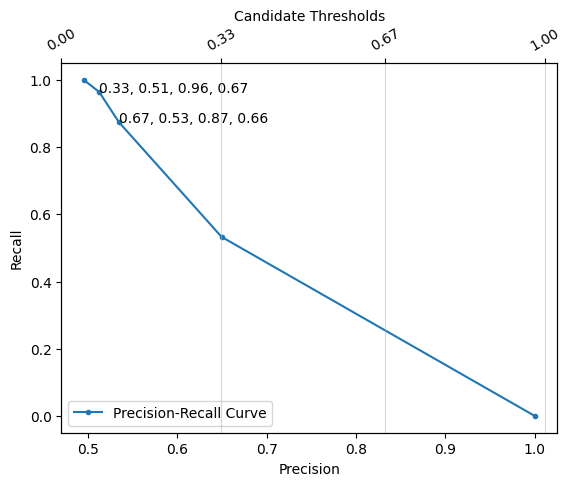

In [10]:
plot_prediction(f"{filename}_top5", testY, [list_predictions[i] for i in find_top_index(results, n=3)])

In [21]:
all_flg = 0.30
print(print_result(testY, aggregate_pred(list_predictions, flag=all_flg)))
print(confusion_matrix(testY, aggregate_pred(list_predictions, flag=all_flg)))
print()

top_flg = 0.40
print(print_result(testY, aggregate_pred([list_predictions[i] for i in find_top_index(results, 5)], flag=top_flg)))
print(confusion_matrix(testY, aggregate_pred([list_predictions[i] for i in find_top_index(results, 5)], flag=top_flg)))

[0.65, 0.62, 0.83, 0.71, 0.65, 0.32]
[[114 128]
 [ 43 205]]

[0.67, 0.64, 0.8, 0.71, 0.67, 0.36]
[[132 110]
 [ 50 198]]
